In [3]:
from google.colab import files
uploaded = files.upload()

Saving adult.data to adult.data
Saving adult.test to adult.test


Combining the files and adding header to the dataset file

In [4]:
filenames = ['adult.data', 'adult.test']
with open('full_data.data', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

The given number of attributes: 14, the 15th attribute named as class is defined on the salary amount. Defining the headers in this section.

In [5]:
import pandas as pd
data = pd.read_csv('full_data.data', 
                  sep=',', 
                  names=["age","workclass","salary","education","education-num","marital status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary_class"])
data

,age,workclass,salary,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48839,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48840,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48841,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


Data features and their dimensions

In [6]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48843 non-null  object 
 1   workclass       48842 non-null  object 
 2   salary          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  salary_class    48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB


(48843, 15)

Bar chart for gender distribution in the data

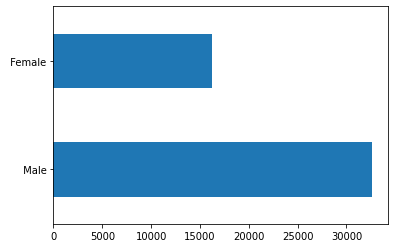

In [32]:
data['sex'].value_counts().plot(kind='barh')

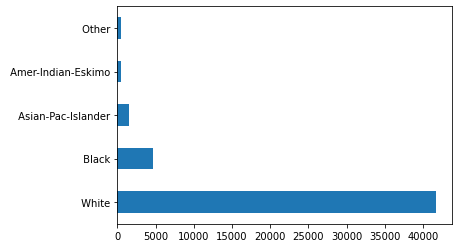

In [12]:
data['race'].value_counts().plot(kind='barh')

line plot for the salary and sex

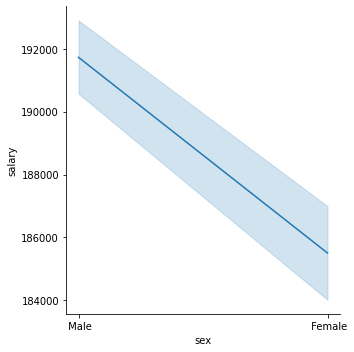

In [66]:
import seaborn as sns
sns.relplot(x="sex", y="salary", kind="line", data= data);

Mean and Variance

In [14]:
data.describe()

,salary,education-num,capital-gain,capital-loss,hours-per-week
count,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [55]:
print(data.var())

salary            1.115221e+10
education-num     6.609901e+00
capital-gain      5.553259e+07
capital-loss      1.624127e+05
hours-per-week    1.535479e+02
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Find the columns with missing values

In [ ]:
df=data.isna().any()
df

age               False
workclass          True
salary             True
education          True
education-num      True
marital status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain       True
capital-loss       True
hours-per-week     True
native-country     True
salary_class       True
dtype: bool

Return the rows with missing values

In [ ]:
null_data = data[data.isnull().any(axis=1)]
null_data

,age,workclass,salary,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_class
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing the Missing values as only 1 row will be affected out of 32561

In [ ]:
cleaned_df = data.dropna()

Checking the missing values again

In [ ]:
df=cleaned_df.isna().any()
df

age               False
workclass         False
salary            False
education         False
education-num     False
marital status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary_class      False
dtype: bool

In [ ]:
cleaned_df.info()
cleaned_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  object 
 1   workclass       48842 non-null  object 
 2   salary          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  salary_class    48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 6.0+ MB


(48842, 15)

In [ ]:
age = cleaned_df['age'].unique()
workclass = cleaned_df['workclass'].unique()
salary = cleaned_df['salary'].unique()
education = cleaned_df['education'].unique()
education_num	= cleaned_df['education-num'].unique()
marital_status = cleaned_df['marital status'].unique()
occupation	= cleaned_df['occupation'].unique()
relationship	= cleaned_df['relationship'].unique()
race	= cleaned_df['race'].unique()
sex	= cleaned_df['sex'].unique()
capital_gain	= cleaned_df['capital-gain'].unique()
capital_loss	= cleaned_df['capital-loss'].unique()
hours_per_week	= cleaned_df['hours-per-week'].unique()
native_country	= cleaned_df['native-country'].unique()
class_= cleaned_df['salary_class'].unique()

print(age,"\n\n",workclass,"\n\n",salary,"\n\n",education,"\n\n",education_num,"\n\n",marital_status,"\n\n",
      occupation,"\n\n",relationship,"\n\n",race,"\n\n",sex,"\n\n",capital_gain,"\n\n",capital_loss,"\n\n",
      hours_per_week,"\n\n",native_country,"\n\n",class_)

['39' '50' '38' '53' '28' '37' '49' '52' '31' '42' '30' '23' '32' '40'
 '34' '25' '43' '54' '35' '59' '56' '19' '20' '45' '22' '48' '21' '24'
 '57' '44' '41' '29' '18' '47' '46' '36' '79' '27' '67' '33' '76' '17'
 '55' '61' '70' '64' '71' '68' '66' '51' '58' '26' '60' '90' '75' '65'
 '77' '62' '63' '80' '72' '74' '69' '73' '81' '78' '88' '82' '83' '84'
 '85' '86' '87' '89'] 

 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

 [ 77516.  83311. 215646. ... 173449.  89686. 350977.] 

 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

 [13.  9.  7. 14.  5. 10. 12. 11.  4. 16. 15.  3.  6.  2.  1.  8.] 

 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

 [' Adm-clerical' ' Exec-managerial' ' Handlers-

In [ ]:
a = cleaned_df['workclass'].replace({" ?": " NA"}, inplace=True)
b = cleaned_df['native-country'].replace({" ?": " NA"}, inplace=True)
c = cleaned_df['occupation'].replace({" ?": " NA"}, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
workclass = cleaned_df['workclass'].unique()

native_country	= cleaned_df['native-country'].unique()

occupation	= cleaned_df['occupation'].unique()
print(native_country,"\n\n",workclass,"\n\n",occupation)

[' United-States' ' Cuba' ' Jamaica' ' India' ' NA' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands'] 

 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' NA' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' NA'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


Now, can the number of corrected attributes be removed?

In [ ]:
g=cleaned_df['workclass'].str.contains('NA').value_counts()[True]
h=cleaned_df['native-country'].str.contains('NA').value_counts()[True]
i=cleaned_df['occupation'].str.contains('NA').value_counts()[True]

print(g,h,i)

2799 857 2809


Standarization

In [ ]:
cleaned_df.describe()

,salary,education-num,capital-gain,capital-loss,hours-per-week
count,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#changing age data type to numeric from object
cleaned_df["age"] = pd.to_numeric(cleaned_df["age"])

#create new dataframe with numerical attributes
df_x = cleaned_df[['age', 'salary', 'education-num', 'capital-gain','capital-loss','hours-per-week']]

x=(df_x - df_x.mean())
y=(df_x.std())

#standardize the values for each predictor variable (z-score)

cleaned_df_standardize=cleaned_df[['age','salary', 'education-num', 'capital-gain','capital-loss','hours-per-week']] = x/y

cleaned_df_standardize.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,salary,education-num,capital-gain,capital-loss,hours-per-week
0,0.025996,-1.061968,1.136500,0.146931,-0.217125,-0.034087
1,0.828300,-1.007094,1.136500,-0.144802,-0.217125,-2.213009
2,-0.046941,0.246031,-0.419331,-0.144802,-0.217125,-0.034087
3,1.047110,0.426659,-1.197247,-0.144802,-0.217125,-0.034087
4,-0.776309,1.408515,1.136500,-0.144802,-0.217125,-0.034087
5,-0.119878,0.898809,1.525458,-0.144802,-0.217125,-0.034087
6,0.755363,-0.279129,-1.975162,-0.144802,-0.217125,-1.970907
7,0.974173,0.189177,-0.419331,-0.144802,-0.217125,0.369418
8,-0.557498,-1.362478,1.525458,1.745156,-0.217125,0.772922
9,0.244806,-0.286117,1.136500,0.550043,-0.217125,-0.034087


Z-score is showing negative values for hours per week.

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [ ]:
#Normalization
a=(df_x - df_x.min())
b=(df_x.max() - df_x.min())

cleaned_df_normalized=cleaned_df[['age','salary', 'education-num', 'capital-gain','capital-loss','hours-per-week']] = a/b
cleaned_df_normalized

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,salary,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.044131,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048052,0.800000,0.000000,0.0,0.122449
2,0.287671,0.137581,0.533333,0.000000,0.0,0.397959
3,0.493151,0.150486,0.400000,0.000000,0.0,0.397959
4,0.150685,0.220635,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
48838,0.301370,0.137428,0.800000,0.000000,0.0,0.357143
48839,0.643836,0.209130,0.533333,0.000000,0.0,0.397959
48840,0.287671,0.245379,0.800000,0.000000,0.0,0.500000
48841,0.369863,0.048444,0.800000,0.054551,0.0,0.397959
